In [54]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from collections import Counter


import warnings
warnings.filterwarnings("ignore")
 

In [55]:
data = pd.read_csv("olimpiyatlar.csv")
data.head(15)
data.tail(15)

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271101,135562,Milan Zyka,M,24.0,173.0,68.0,Czechoslovakia,TCH,1972 Summer,1972,Summer,Munich,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver
271104,135564,Yevgeny Aleksandrovich Zykov,M,22.0,172.0,65.0,Russia-1,RUS,2002 Winter,2002,Winter,Salt Lake City,Luge,Luge Mixed (Men)'s Doubles,NaN
271105,135565,Fernando scar Zylberberg,M,23.0,168.0,76.0,Argentina,ARG,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [57]:
data.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [58]:
data = data.drop(["ID","Games"],axis=1)
data.head(5)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [59]:
unique_event = pd.unique(data.Event)
print(len(unique_event))
unique_event[:10]

765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [60]:
dt_copy = data.copy()
HW_list = ["Height","Weight"]

for e in unique_event:
    #etkinlik filtresi
    event_filter = dt_copy.Event == e
    #veriyi filtreleme
    dt_filtered = dt_copy[event_filter]

    #boy ve kilo için etkinlik ort hesaplama
    for s in HW_list:
        avr = np.round(np.mean(dt_filtered[s]),2)
        
        if ~np.isnan(avr): #etkinlik için ort varsa
            dt_filtered[s] = dt_filtered[s].fillna(avr)
        else: # etkinlik için ort yoksa ort hesapla
            all_dt_avr = np.round(np.mean(data[s]),2)
            dt_filtered[s] = dt_filtered[s].fillna(all_dt_avr)
    
    #doldurulmuş datayı birleştirme 
    dt_copy[event_filter] = dt_filtered

data = dt_copy.copy()
data.info()



        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Gender  271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [61]:
average_age = np.round(np.mean(data.Age),2)
data["Age"] = data["Age"].fillna(average_age)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Gender  271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


Madalya Verileri

In [62]:
medal_var = data["Medal"]
pd.isnull(medal_var).sum()

231333

In [63]:
medal_filter = ~pd.isnull(medal_var)

data = data[medal_filter]
data.head(5)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    39783 non-null  object 
 1   Gender  39783 non-null  object 
 2   Age     39783 non-null  float64
 3   Height  39783 non-null  float64
 4   Weight  39783 non-null  float64
 5   Team    39783 non-null  object 
 6   NOC     39783 non-null  object 
 7   Year    39783 non-null  int64  
 8   Season  39783 non-null  object 
 9   City    39783 non-null  object 
 10  Sport   39783 non-null  object 
 11  Event   39783 non-null  object 
 12  Medal   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [65]:
data.to_csv("olmpyics_clear.csv",index=False)

### Data Visualization

In [66]:
def plotHistogram(var):
    """
        Input : Variable/Column
        Output : Histogram 
    """

    plt.figure()
    plt.hist(data[var],bins = 85, color = "orange") 
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title("Data Frequency - {}".format(var))
    plt.show()
    
def plotBox(var):
    """
        Input : Variable/Column
        Output : Box
    """

    plt.boxplot(data[var])
    plt.xlabel(var)
    plt.ylabel("Value")
    plt.title("Data Value - {}".format(var))
    plt.show()
    
    


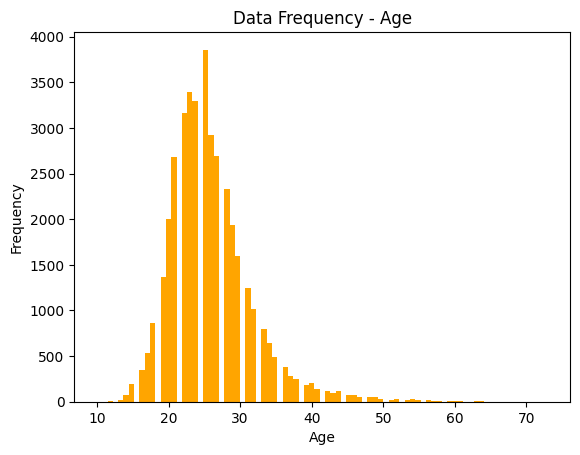

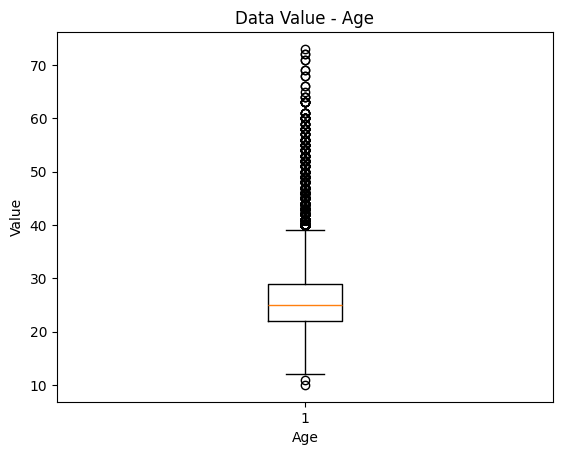

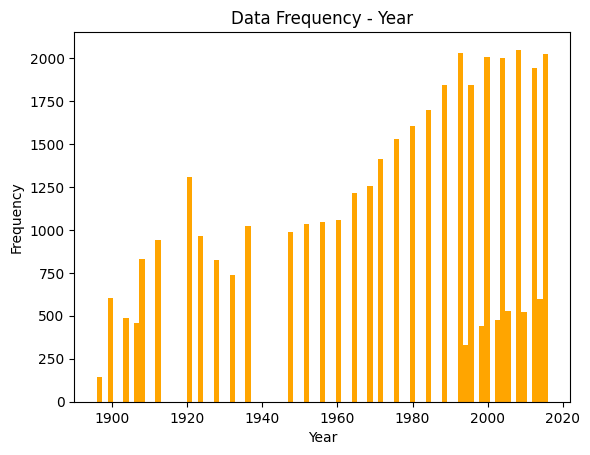

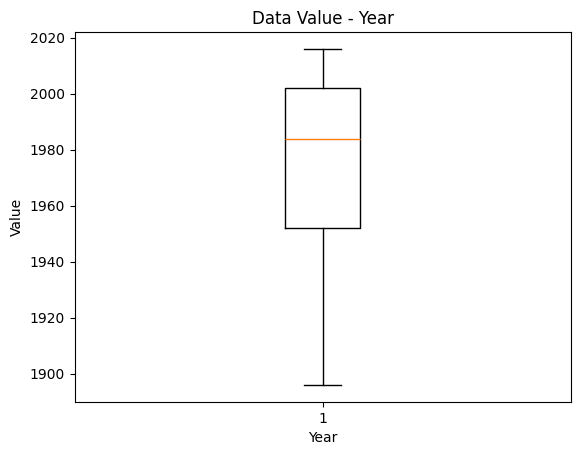

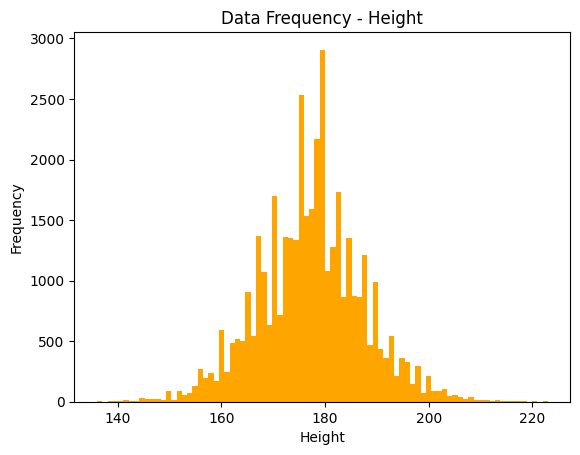

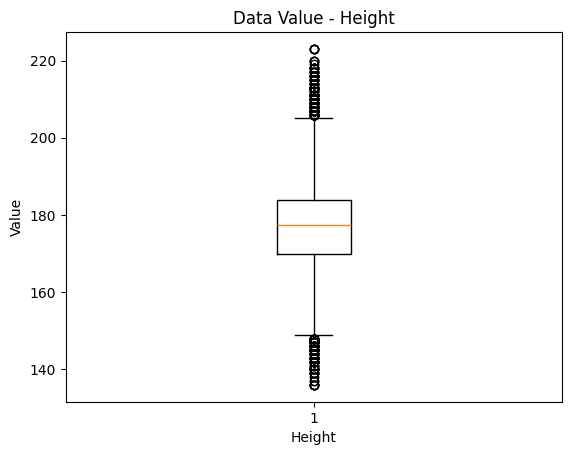

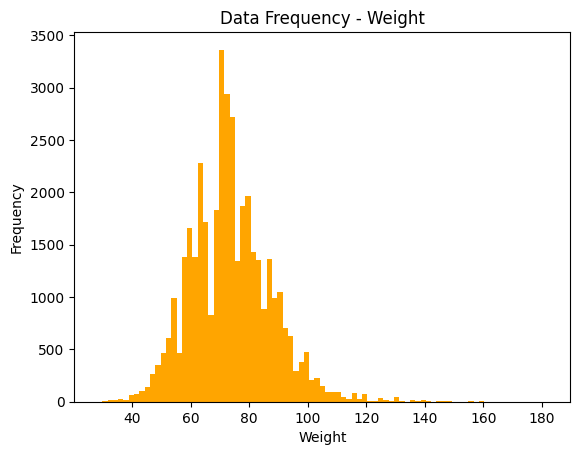

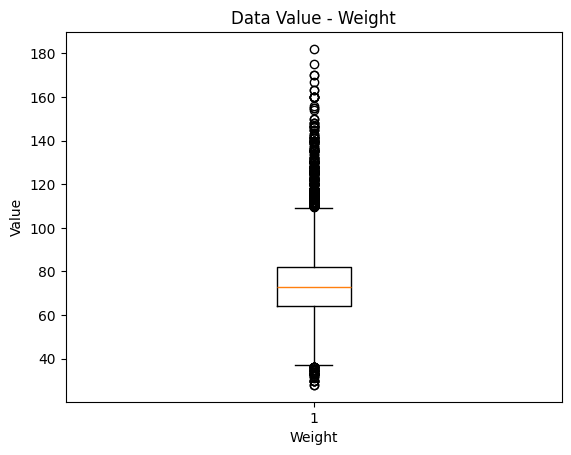

In [67]:
num_variables = ["Age","Year","Height","Weight"]
for e  in num_variables:
    plotHistogram(e)
    plotBox(e)

In [68]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,39783.0,25.918456,5.859569,10.0,22.0,25.00,29.0,73.0
Height,39783.0,177.336690,10.170124,136.0,170.0,177.48,184.0,223.0
Weight,39783.0,73.738320,13.979041,28.0,64.0,73.00,82.0,182.0
Year,39783.0,1973.943845,33.822857,1896.0,1952.0,1984.00,2002.0,2016.0


In [69]:
def plotBar(var,n = 5):
    """"
        Input : Var/Column
        n = number of shown unique values
        Output : Bar Graph
    """
    data_ = data[var]
    dt_count = data_.value_counts()
    dt_count = dt_count[:n]
    plt.figure()
    plt.bar(dt_count.index,dt_count,color = "orange")
    plt.xticks(dt_count.index,dt_count.index.values)
    plt.xticks(rotation = 45)
    plt.ylabel("Frequency")
    plt.title("Data Frequency - {} ".format(var,dt_count))
    plt.show()
    print("{} \n {}".format(var,dt_count))

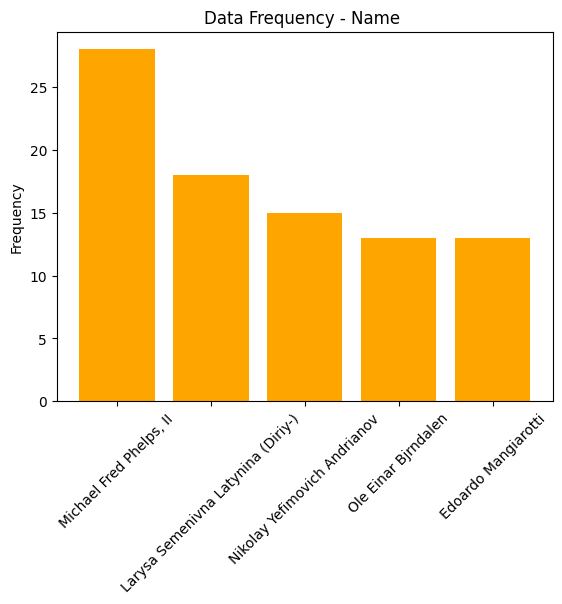

Name 
 Name
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: count, dtype: int64


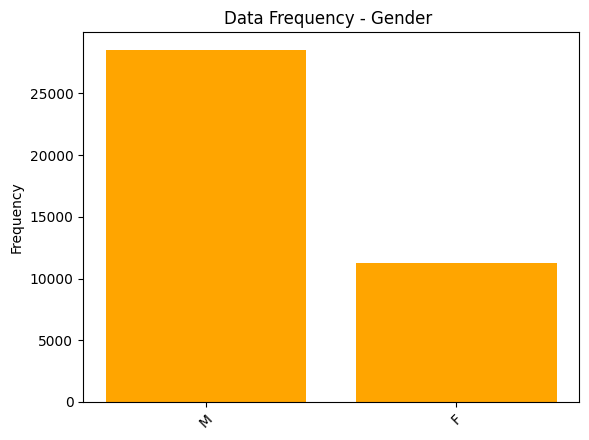

Gender 
 Gender
M    28530
F    11253
Name: count, dtype: int64


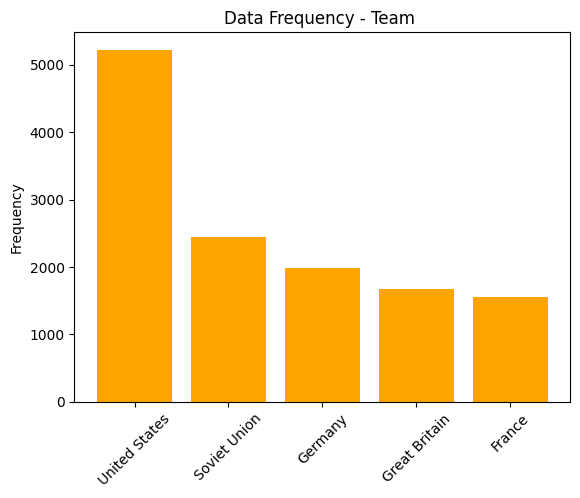

Team 
 Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: count, dtype: int64


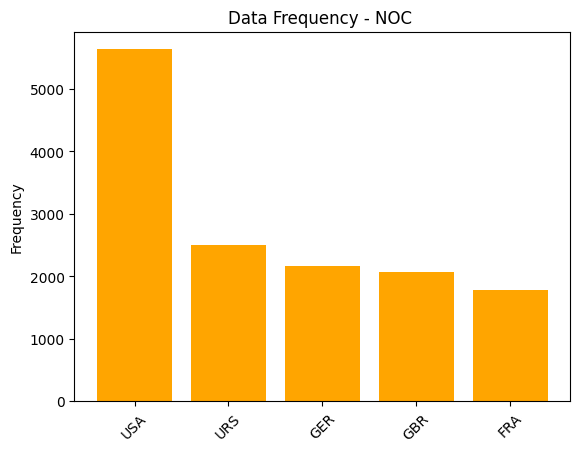

NOC 
 NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: count, dtype: int64


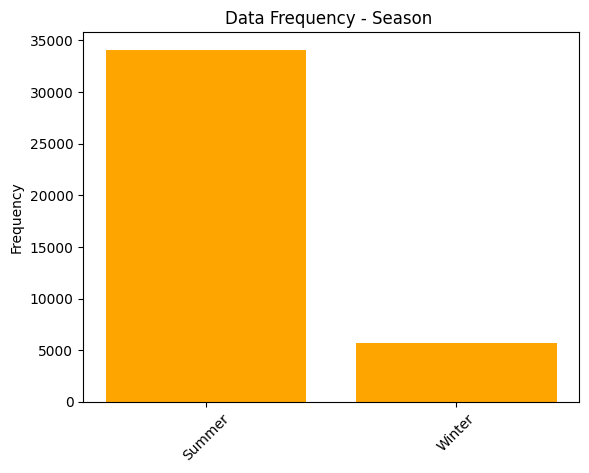

Season 
 Season
Summer    34088
Winter     5695
Name: count, dtype: int64


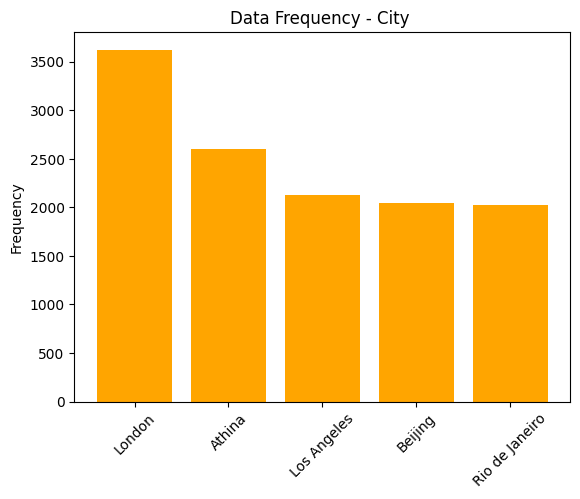

City 
 City
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: count, dtype: int64


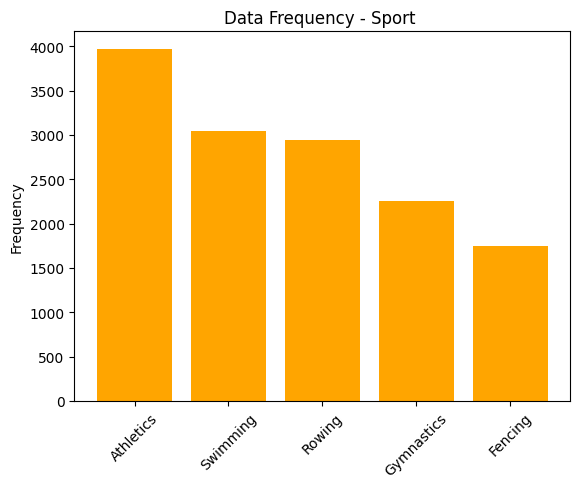

Sport 
 Sport
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: count, dtype: int64


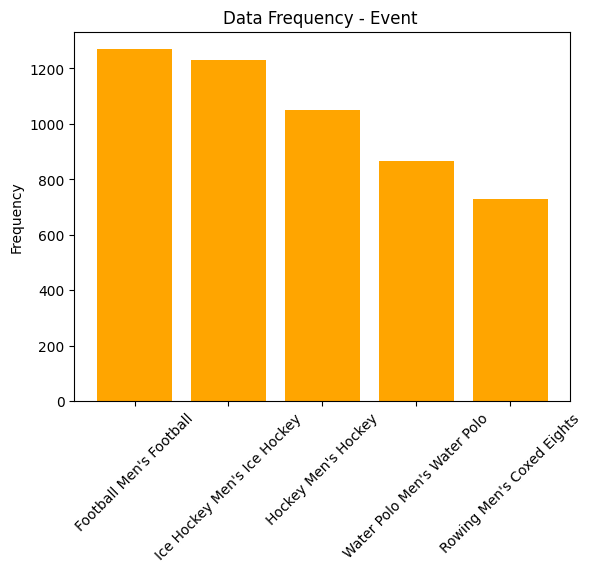

Event 
 Event
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: count, dtype: int64


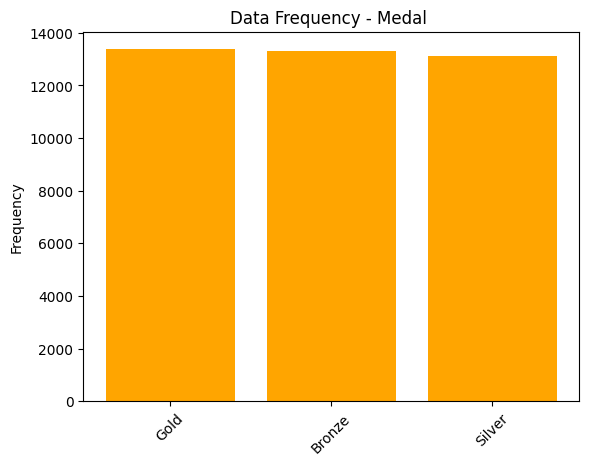

Medal 
 Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64


In [70]:
cat_vars = ["Name","Gender","Team","NOC","Season","City","Sport","Event","Medal"]
for e in cat_vars:
    plotBar(e)

In [71]:
Male = data[data.Gender == "M"]
Male.head()

Male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28530 entries, 3 to 271082
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    28530 non-null  object 
 1   Gender  28530 non-null  object 
 2   Age     28530 non-null  float64
 3   Height  28530 non-null  float64
 4   Weight  28530 non-null  float64
 5   Team    28530 non-null  object 
 6   NOC     28530 non-null  object 
 7   Year    28530 non-null  int64  
 8   Season  28530 non-null  object 
 9   City    28530 non-null  object 
 10  Sport   28530 non-null  object 
 11  Event   28530 non-null  object 
 12  Medal   28530 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.0+ MB


In [72]:
Female = data[data.Gender == "F"]
Female.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11253 entries, 79 to 271103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    11253 non-null  object 
 1   Gender  11253 non-null  object 
 2   Age     11253 non-null  float64
 3   Height  11253 non-null  float64
 4   Weight  11253 non-null  float64
 5   Team    11253 non-null  object 
 6   NOC     11253 non-null  object 
 7   Year    11253 non-null  int64  
 8   Season  11253 non-null  object 
 9   City    11253 non-null  object 
 10  Sport   11253 non-null  object 
 11  Event   11253 non-null  object 
 12  Medal   11253 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


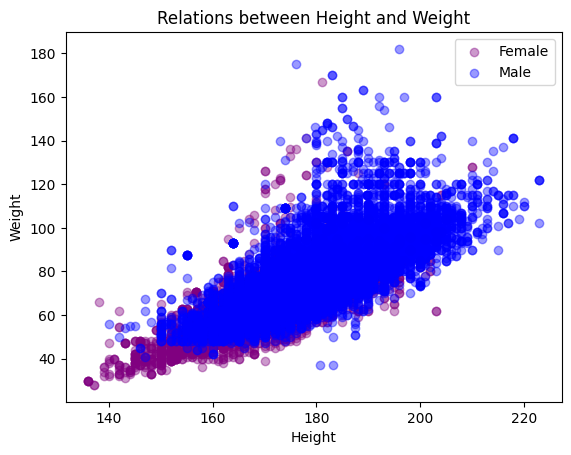

In [73]:
plt.figure()
plt.scatter(Female.Height,Female.Weight,alpha=0.4,label="Female",color ="purple")
plt.scatter(Male.Height,Male.Weight,alpha=0.4,label="Male",color = "blue")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Relations between Height and Weight")
plt.legend()
plt.show()



In [74]:
data.loc[:,["Age","Height","Weight"]].corr()  #korrelasyon matrisi

,Age,Height,Weight
Age,1.000000,0.061890,0.136349
Height,0.061890,1.000000,0.794368
Weight,0.136349,0.794368,1.000000


In [75]:
dt_copy = data.copy()
dt_copy = pd.get_dummies(dt_copy, columns=["Medal"])
dt_copy.head()

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,True,False,False
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,True,False,False
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,True,False,False


In [76]:
dt_copy.loc[:,["Age","Medal_Bronze","Medal_Gold","Medal_Silver"]].corr()

,Age,Medal_Bronze,Medal_Gold,Medal_Silver
Age,1.000000,-0.005584,-0.002576,0.008192
Medal_Bronze,-0.005584,1.000000,-0.504110,-0.496859
Medal_Gold,-0.002576,-0.504110,1.000000,-0.499022
Medal_Silver,0.008192,-0.496859,-0.499022,1.000000


In [77]:
dt_copy[["Team","Medal_Gold","Medal_Silver","Medal_Bronze"]].groupby(["Team"],as_index=False).sum().sort_values(by="Medal_Gold",ascending=False)[:10]

,Team,Medal_Gold,Medal_Silver,Medal_Bronze
462,United States,2474,1512,1233
403,Soviet Union,1058,716,677
165,Germany,679,627,678
215,Italy,535,508,484
171,Great Britain,519,582,572
149,France,455,518,577
420,Sweden,451,476,507
198,Hungary,432,330,365
67,Canada,422,413,408
117,East Germany,369,309,263


In [78]:
dt_copy[["City","Medal_Gold","Medal_Silver","Medal_Bronze"]].groupby(["City"],as_index=False).sum().sort_values(by="Medal_Gold",ascending=False)[:10]

,City,Medal_Gold,Medal_Silver,Medal_Bronze
17,London,1215,1195,1214
3,Athina,883,859,860
18,Los Angeles,726,691,706
6,Beijing,671,667,710
27,Rio de Janeiro,665,655,703
38,Sydney,663,661,680
4,Atlanta,608,605,629
5,Barcelona,559,549,604
33,Seoul,520,513,549
2,Antwerpen,493,448,367


In [79]:
dt_copy[["Gender","Medal_Gold","Medal_Silver","Medal_Bronze"]].groupby(["Gender"],as_index=False).sum().sort_values(by="Medal_Gold",ascending=False)

,Gender,Medal_Gold,Medal_Silver,Medal_Bronze
1,M,9625,9381,9524
0,F,3747,3735,3771


In [80]:
dt_pivot = data.pivot_table(index="Medal",columns="Gender", values=["Height","Weight","Age"],aggfunc={"Height":np.mean,"Weight":np.mean,"Age":[min,max,np.std]})
dt_pivot.head()

Age                                            Height              \
         max         min             std                  mean               
Gender     F     M     F     M         F         M           F           M   
Medal                                                                        
Bronze  69.0  72.0  12.0  10.0  5.329229  5.870340  170.003227  180.045806   
Gold    63.0  64.0  13.0  13.0  5.219615  5.987807  170.448727  180.318906   
Silver  55.0  73.0  11.0  13.0  5.253111  6.098221  170.233783  180.053626   

           Weight             
             mean             
Gender          F          M  
Medal                         
Bronze  62.757125  77.841504  
Gold    63.199349  78.186505  
Silver  62.866892  77.960887

In [81]:
def outlierDetect(df,feature):
    outlier_indices = []
    for c in feature:
        #Quarter 1
        Q1 = np.percentile(df[c],25)
        #Quarter 3
        Q3 = np.percentile(df[c],75)
        #Inter Quartile Range
        IQR = Q3 - Q1
        #Step size for outlier value
        outlier_step = 1.5 * IQR
        #Outlier Value and Its index
        outlier_list_col = df[(df[c] < Q1 - outlier_step )| (df[c] > Q3 + outlier_step)].index
        #Store the detected Indices
        outlier_indices.extend(outlier_list_col)

#Unique Outliers
    outlier_indices = Counter(outlier_indices)
#If c is different for number of v columns its outlier
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)

    return multiple_outliers

In [82]:
data_outliers = data.loc[outlierDetect(data,["Age","Height","Weight"])]
data_outliers.Sport.value_counts()

Sport
Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: count, dtype: int64

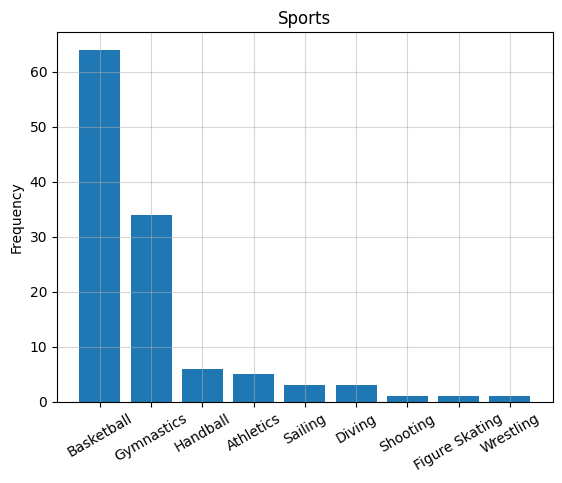

In [83]:
plt.figure()
plt.bar(data_outliers.Sport.value_counts().index, data_outliers.Sport.value_counts().values)
plt.xticks(rotation = 30)
plt.title("Sports")
plt.ylabel("Frequency")
plt.grid(True,alpha = 0.5)
plt.show()

In [84]:
data_gym = data_outliers[data_outliers.Sport == "Gymnastics"]
data_gym.head()


,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold


In [85]:
print(data_gym.Event.value_counts())

Event
Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: count, dtype: int64


In [86]:
data_ball = data_outliers[data_outliers.Sport == "Basketball"]
print(data_ball.Event.value_counts())
data_ball.head()

Event
Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: count, dtype: int64


,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [87]:
#Yıllarla ilgii calismalar
data_years = data.copy()

unique_years = data_years.Year.unique()
unique_years

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [88]:
sorted_years = np.sort(unique_years)
sorted_years

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

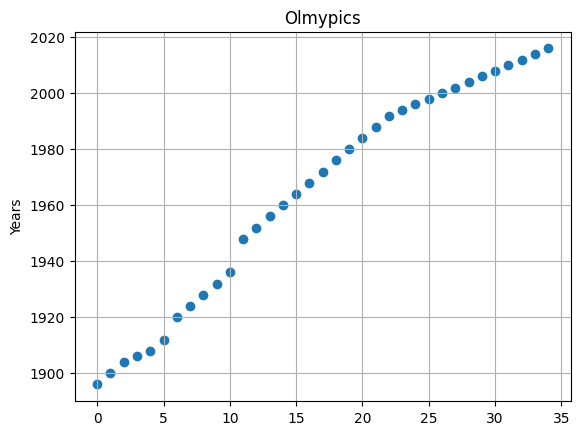

In [89]:
plt.figure()
plt.scatter(range(len(sorted_years)),sorted_years)
plt.grid(True)
plt.ylabel("Years")
plt.title("Olmypics")
plt.show()
#Görselde oluşan boşluklar dünya savaşı yılları denk gelmektedir

In [90]:
date_time_object = pd.to_datetime(data_years["Year"],format = "%Y")
print(type(date_time_object))
date_time_object.head()

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
40   2014-01-01
41   1948-01-01
Name: Year, dtype: datetime64[ns]

In [91]:
data_years["Date"] = date_time_object
data_years

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Date
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,2014-01-01
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1948-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,1956-01-01
271080,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,1964-01-01
271082,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,1980-01-01
271102,Olesya Nikolayevna Zykina,F,19.0,171.00,64.00,Russia,RUS,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,2000-01-01


In [92]:
#Zamanla ilgili datanın indexini zamana göre ayarladık
data_years = data_years.set_index("Date")
data_years.drop(["Year"], axis= 1 , inplace= True)
data_years

,Name,Gender,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal
Date,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
1956-01-01,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
1964-01-01,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
1980-01-01,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


In [93]:

data_years.head(10)

,Name,Gender,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal
Date,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
1952-01-01,Paavo Johannes Aaltonen,M,32.0,175.00,64.00,Finland,FIN,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze


In [97]:
data_years.dropna()
periodic_data = data_years.resample("2A").mean()
periodic_data.head(3)

TypeError: agg function failed [how->mean,dtype->object]